
# <font color='blue'><br>Optimisation de rendement des portefeuilles.</font>





In [ ]:
pip install yfinance



# <font color='darkpink'>Téléchargement des données historiques des actions de Microsoft, Apple, et Google</font>



In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import minimize



### 1. **Apple Inc. (AAPL)**
- **Secteur**: Technologie
- **Produits/Services**: Apple est célèbre pour ses produits électroniques de consommation, y compris l'iPhone, l'iPad, le Mac, l'Apple Watch, et l'Apple TV. L'entreprise offre également des services numériques tels que l'App Store, Apple Music, iCloud, et récemment Apple TV+ et Apple Arcade.
- **Importance économique**: Apple est l'une des entreprises les plus valorisées au monde, réputée pour son innovation constante dans le domaine de la technologie de consommation et son impact significatif sur plusieurs industries, allant de la technologie grand public à la musique et au divertissement.

### 2. **Microsoft Corporation (MSFT)**
- **Secteur**: Technologie
- **Produits/Services**: Microsoft est bien connu pour son système d'exploitation Windows, sa suite de productivité Office, et d'autres logiciels comme SQL Server et SharePoint. L'entreprise s'est également diversifiée dans le cloud computing avec Azure, offre des appareils comme les tablettes Surface et des consoles de jeux Xbox, et fournit des services sociaux et de divertissement, notamment LinkedIn et Skype.
- **Importance économique**: En tant que l'une des entreprises pionnières du logiciel, Microsoft joue un rôle crucial dans l'informatique d'entreprise et personnelle et est un acteur majeur dans le développement de solutions cloud, ce qui lui confère une position stratégique dans la transformation numérique mondiale.

### 3. **Alphabet Inc. (GOOGL)**
- **Secteur**: Technologie et Communication
- **Produits/Services**: Alphabet est la société mère de Google, bien connue pour son moteur de recherche dominant, ainsi que pour une série de produits et services comme Android, Google Maps, YouTube, Google Cloud, et Google Ads. En plus de ces produits grand public, Alphabet investit également dans des technologies de pointe via ses filiales Other Bets, qui incluent Waymo (véhicules autonomes) et Verily (sciences de la vie).
- **Importance économique**: Alphabet/Google est au cœur de l'écosystème Internet mondial, influençant de nombreux aspects de la vie quotidienne et des affaires grâce à son leadership dans les données, la publicité et l'innovation en matière d'IA et de technologie.

Ces trois entreprises sont des géants de la technologie et jouent des rôles clés dans l'économie mondiale, influençant de nombreux secteurs et façonnant les tendances technologiques futures. Chacune a ses propres domaines de spécialisation, mais toutes contribuent de manière significative à l'innovation, à la croissance économique, et à la transformation numérique.

In [ ]:
# Liste des tickers
tickers = ["AAPL", "MSFT", "GOOGL"]

# Télécharger les données historiques pour les tickers spécifiés
data = yf.download(tickers, start="2010-01-01", end="2020-01-01")

# Convertir les index de 'data' pour retirer les spécifications de fuseau horaire
data.index = data.index.tz_localize(None)

# Initialisation des DataFrames pour les dividendes et les splits
dividends = pd.DataFrame(index=data.index)
splits = pd.DataFrame(index=data.index)

# Parcourir chaque ticker pour récupérer les dividendes et les splits
for ticker in tickers:
    stock = yf.Ticker(ticker)
    # Assurer que les dividendes et splits sont récupérés sans fuseau horaire
    divs = stock.dividends.copy()
    divs.index = divs.index.tz_localize(None)
    splts = stock.splits.copy()
    splts.index = splts.index.tz_localize(None)

    # Réindexer les dividendes et splits pour correspondre à 'data'
    divs = divs.reindex(data.index, method='ffill').fillna(0)
    splts = splts.reindex(data.index, method='ffill').fillna(0)

    # Ajouter les dividendes et splits au DataFrame correspondant
    dividends[ticker] = divs
    splits[ticker] = splts

# Afficher les premières lignes de chaque DataFrame pour vérification
data.head()

[*********************100%%**********************]  3 of 3 completed


Price      Adj Close                           Close                        \
Ticker          AAPL      GOOGL       MSFT      AAPL      GOOGL       MSFT   
Date                                                                         
2010-01-04  6.470741  15.684434  23.431587  7.643214  15.684434  30.950001   
2010-01-05  6.481929  15.615365  23.439156  7.656429  15.615365  30.959999   
2010-01-06  6.378824  15.221722  23.295321  7.534643  15.221722  30.770000   
2010-01-07  6.367033  14.867367  23.053059  7.520714  14.867367  30.450001   
2010-01-08  6.409364  15.065566  23.212036  7.570714  15.065566  30.660000   

Price           High                             Low                        \
Ticker          AAPL      GOOGL       MSFT      AAPL      GOOGL       MSFT   
Date                                                                         
2010-01-04  7.660714  15.753504  31.100000  7.585000  15.621622  30.590000   
2010-01-05  7.699643  15.711712  31.100000  7.616071  15.554054  30.639999   
2010-01-06  7.686786  15.662162  31.080000  7.526786  15.174174  30.520000   
2010-01-07  7.571429  15.265265  30.700001  7.466071  14.831081  30.190001   
2010-01-08  7.571429  15.096346  30.879999  7.466429  14.742492  30.240000   

Price           Open                           Volume                       
Ticker          AAPL      GOOGL       MSFT       AAPL      GOOGL      MSFT  
Date                                                                        
2010-01-04  7.622500  15.689439  30.620001  493729600   78169752  38409100  
2010-01-05  7.664286  15.695195  30.850000  601904800  120067812  49749600  
2010-01-06  7.656429  15.662162  30.879999  552160000  158988852  58182400  
2010-01-07  7.562500  15.250250  30.629999  477131200  256315428  50559700  
2010-01-08  7.510714  14.814815  30.280001  447610800  188783028  51197400


### 1. **Les Données de Prix**
Ces données incluent:
- **Open (Ouverture)**: Le prix auquel une action a commencé à trader au début de la journée boursière.
- **High (Plus Haut)**: Le prix le plus élevé atteint par l'action pendant la journée.
- **Low (Plus Bas)**: Le prix le plus bas atteint par l'action pendant la journée.
- **Close (Clôture)**: Le prix de clôture de l'action à la fin de la journée boursière, avant ajustement pour les dividendes ou les splits.
- **Adj Close (Clôture Ajustée)**: Le prix de clôture ajusté qui prend en compte les dividendes et les splits.
- **Volume**: Le nombre total d'actions échangées pendant la journée.





# <font color='darkpink'>Préparation des données d'actions, dividendes et splits pour Microsoft, Apple et Google</font>

In [ ]:
# Liste des tickers
tickers = ["AAPL", "MSFT", "GOOGL"]

# Télécharger les données historiques pour les tickers spécifiés
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")
data.index = data.index.tz_localize(None)  # Uniformiser les fuseaux horaires

# Initialisation des DataFrames pour les dividendes et les splits
dividends = pd.DataFrame(index=data.index)
splits = pd.DataFrame(index=data.index)

# Parcourir chaque ticker pour récupérer les dividendes et les splits
for ticker in tickers:
    stock = yf.Ticker(ticker)
    # Retirer les fuseaux horaires
    divs = stock.dividends.copy()
    divs.index = divs.index.tz_localize(None)
    splts = stock.splits.copy()
    splts.index = splts.index.tz_localize(None)

    # Réindexer et remplir les valeurs manquantes
    divs = divs.reindex(data.index, method='ffill').fillna(0)
    splts = splts.reindex(data.index, method='ffill').fillna(0)

    # Ajouter au DataFrame
    dividends[ticker] = divs
    splits[ticker] = splts

# Concaténer les données de prix, de dividendes et de splits
# Utilisez 'keys' pour distinguer les différents types de données
df = pd.concat([data, dividends.add_suffix('_div'), splits.add_suffix('_split')], axis=1)

# Afficher les premières lignes du DataFrame combiné pour vérification
df.head()


[*********************100%%**********************]  3 of 3 completed


,"(Adj Close, AAPL)","(Adj Close, GOOGL)","(Adj Close, MSFT)","(Close, AAPL)","(Close, GOOGL)","(Close, MSFT)","(High, AAPL)","(High, GOOGL)","(High, MSFT)","(Low, AAPL)",...,"(Open, MSFT)","(Volume, AAPL)","(Volume, GOOGL)","(Volume, MSFT)",AAPL_div,MSFT_div,GOOGL_div,AAPL_split,MSFT_split,GOOGL_split
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,73.059425,68.433998,154.493820,75.087502,68.433998,160.619995,75.150002,68.433998,160.729996,73.797501,...,158.779999,135480400,27278000,22622100,0.1925,0.51,0.0,7.0,2.0,1.998
2020-01-03,72.349136,68.075996,152.570114,74.357498,68.075996,158.619995,75.144997,68.687500,159.949997,74.125000,...,158.320007,146322800,23408000,21116200,0.1925,0.51,0.0,7.0,2.0,1.998
2020-01-06,72.925636,69.890503,152.964478,74.949997,69.890503,159.029999,74.989998,69.916000,159.100006,73.187500,...,157.080002,118387200,46768000,20813700,0.1925,0.51,0.0,7.0,2.0,1.998
2020-01-07,72.582664,69.755501,151.569794,74.597504,69.755501,157.580002,75.224998,70.175003,159.669998,74.370003,...,159.320007,108872000,34330000,21634100,0.1925,0.51,0.0,7.0,2.0,1.998
2020-01-08,73.750244,70.251999,153.984039,75.797501,70.251999,160.089996,76.110001,70.592499,160.800003,74.290001,...,158.929993,132079200,35314000,27746500,0.1925,0.51,0.0,7.0,2.0,1.998


### 2. **Les Données de Dividendes**
Les dividendes représentent une partie du bénéfice de l'entreprise distribuée à ses actionnaires. Les données de dividendes sont cruciales pour les analyses qui visent à comprendre le rendement total d'un investissement en actions, car elles reflètent les retours en espèces que les investisseurs reçoivent en plus des gains en capital.

### 3. **Les Données de Splits**
Un split d'action est un ajustement du nombre total d'actions en circulation, divisées ou multipliées par un certain facteur, sans changer la capitalisation boursière de l'entreprise. Les données de splits sont importantes pour ajuster les prix historiques des actions, afin que ces prix soient comparables avant et après le split. Cela permet d'analyser correctement les performances historiques des actions.


<br>

Ces trois types de données, (Prix , dividende et split) sont fondamentaux pour effectuer une analyse approfondie et précise dans un projet d'optimisation de portefeuilles d'investissement. Ils permettent aux investisseurs et analystes de mesurer les rendements ajustés aux risques, de modéliser des stratégies d'investissement diversifiées, et de comprendre le comportement historique des actions pour mieux prédire les tendances futures.



# <font color='blue'> Partie EDA ▶

.</font>



In [ ]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 1006 
Number of Columns : 24


RQ: Dans le contexte financier: le cours se référer aux prix d'une action ou d'un actif financier

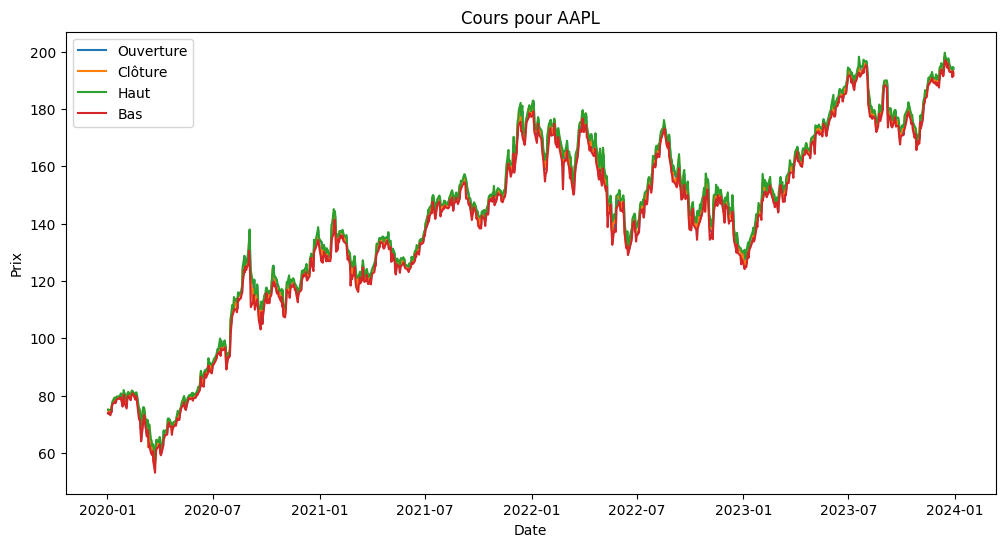

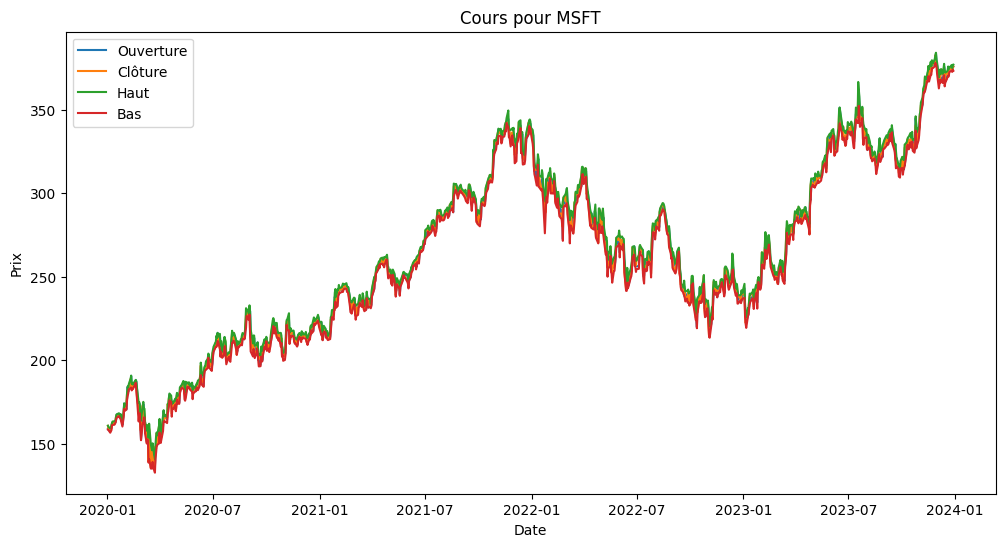

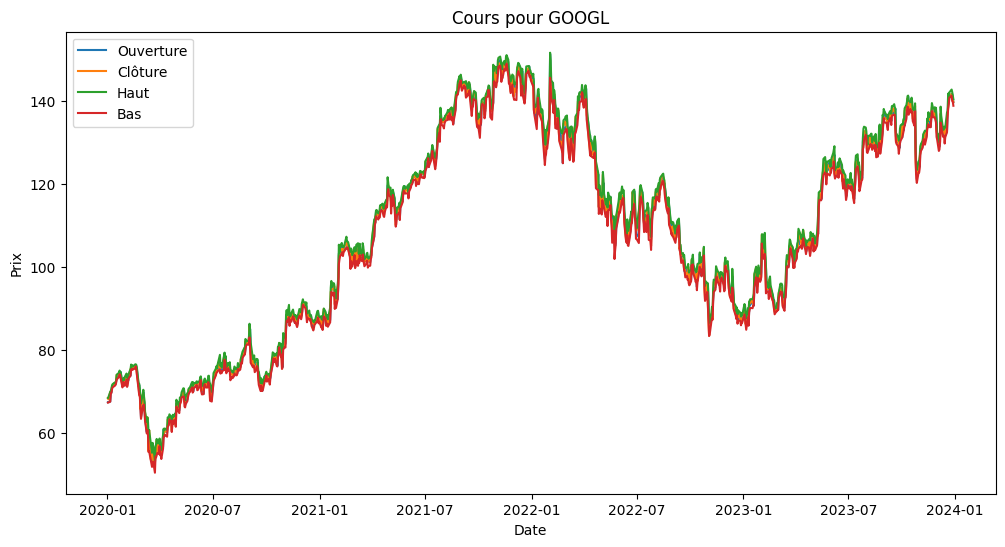

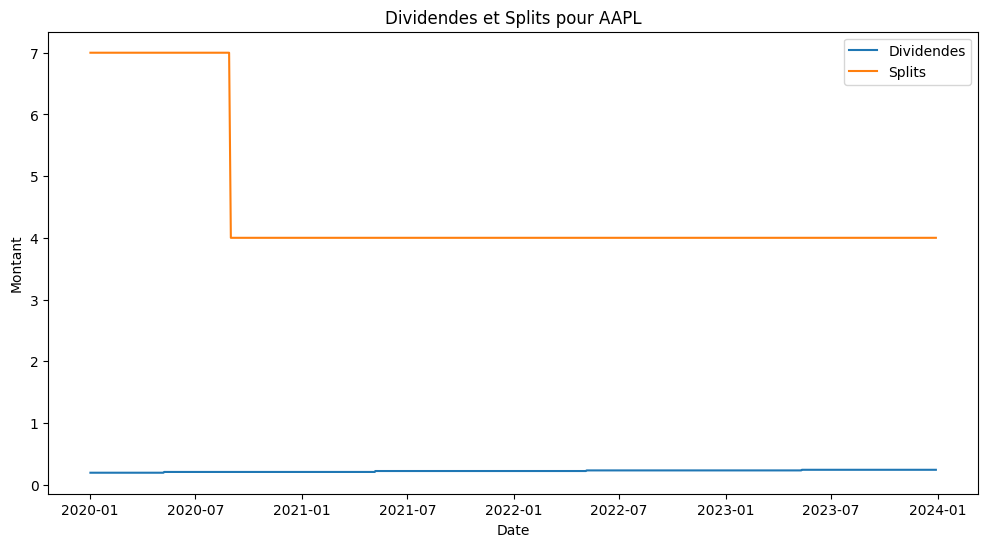

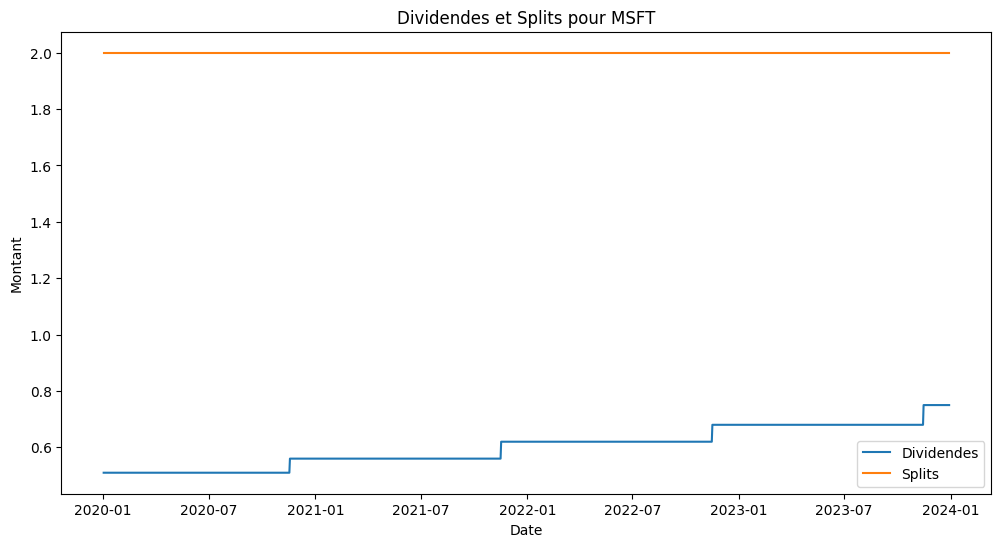

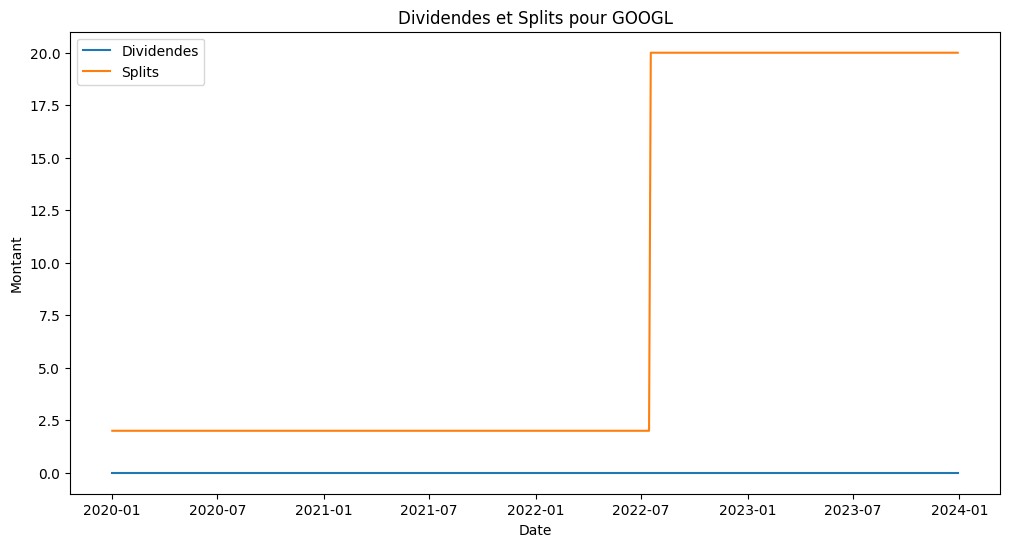

Statistiques descriptives pour AAPL:
Price          Open        Close         High          Low
Ticker         AAPL         AAPL         AAPL         AAPL
count   1006.000000  1006.000000  1006.000000  1006.000000
mean     140.675507   140.808131   142.321389   139.143536
std       33.310018    33.313857    33.430571    33.179199
min       57.020000    56.092499    57.125000    53.152500
25%      123.682503   123.592501   125.030003   122.157499
50%      145.540001   145.860001   147.264999   144.120003
75%      166.302498   166.214996   168.147503   164.815002
max      198.020004   198.110001   199.619995   197.000000


Statistiques descriptives pour MSFT:
Price          Open        Close         High          Low
Ticker         MSFT         MSFT         MSFT         MSFT
count   1006.000000  1006.000000  1006.000000  1006.000000
mean     262.669344   262.781928   265.509354   259.803986
std       54.652568    54.621965    54.732373    54.415635
min      137.009995   135.419998   140.

In [ ]:
# Visualisation des données : cours d'ouverture, de clôture, de haut et de bas
for ticker in tickers:
    plt.figure(figsize=(12, 6))

    # Accéder aux colonnes des données de manière appropriée
    plt.plot(data['Open'][ticker], label='Ouverture')
    plt.plot(data['Close'][ticker], label='Clôture')
    plt.plot(data['High'][ticker], label='Haut')
    plt.plot(data['Low'][ticker], label='Bas')

    plt.title(f"Cours pour {ticker}")
    plt.xlabel('Date')
    plt.ylabel('Prix')
    plt.legend()
    plt.show()

# Visualisation des dividendes et des splits
for ticker in tickers:
    plt.figure(figsize=(12, 6))

    # Visualisation des dividendes
    plt.plot(dividends[ticker], label='Dividendes')

    # Visualisation des splits
    plt.plot(splits[ticker], label='Splits')

    plt.title(f"Dividendes et Splits pour {ticker}")
    plt.xlabel('Date')
    plt.ylabel('Montant')
    plt.legend()
    plt.show()

# Statistiques descriptives
# Calcul et comparaison pour chaque action
for ticker in tickers:
    print(f"Statistiques descriptives pour {ticker}:")
    stats = data[[('Open', ticker), ('Close', ticker), ('High', ticker), ('Low', ticker)]].describe()
    print(stats)
    print("\n")

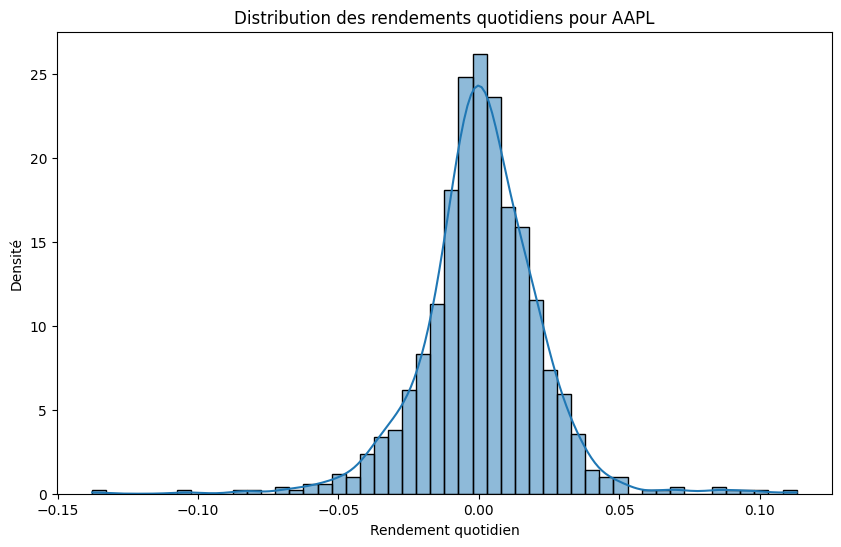

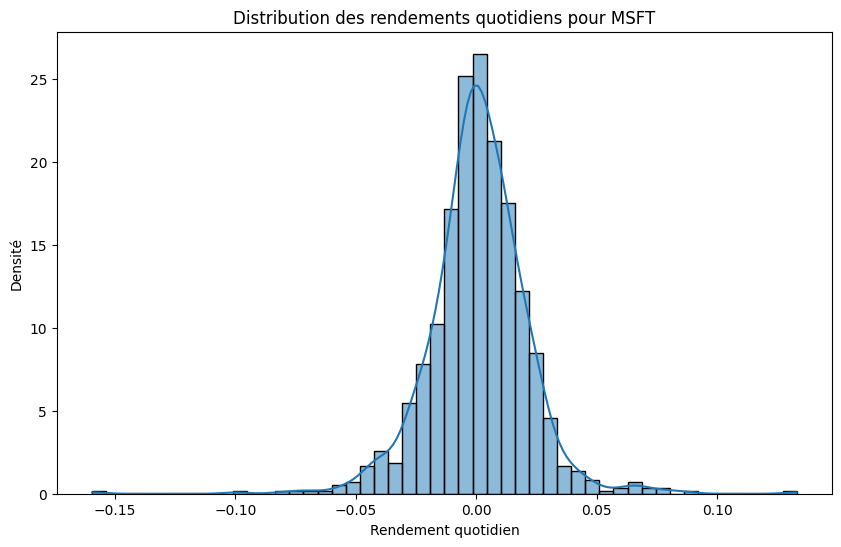

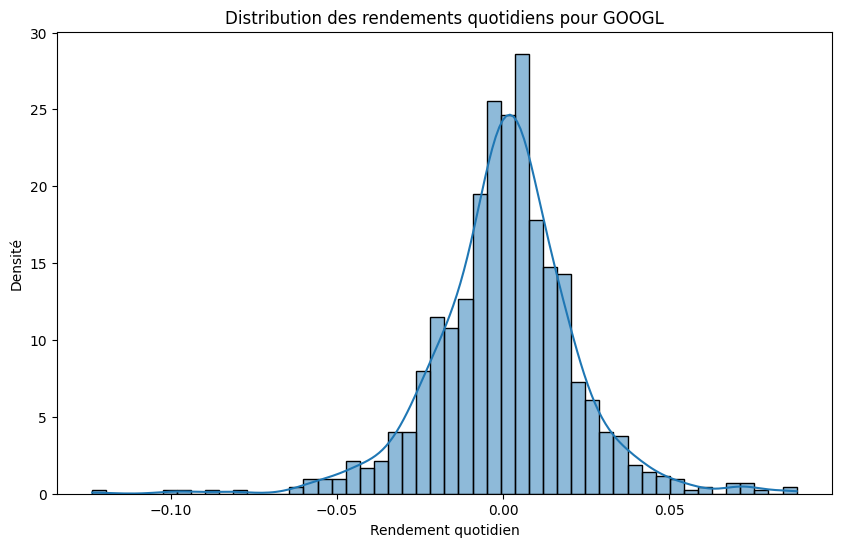

In [ ]:
# Calcul des rendements quotidiens pour chaque action
rendements = {}
for ticker in tickers:
    # Calculez les rendements quotidiens à partir des cours de clôture
    rendements[ticker] = np.log(data['Close'][ticker]).diff()

# Visualisation des distributions des rendements quotidiens
for ticker in tickers:
    plt.figure(figsize=(10, 6))

    # Tracer un histogramme des rendements quotidiens
    sns.histplot(rendements[ticker], kde=True, bins=50, stat='density')

    # Ajouter des labels et un titre
    plt.title(f"Distribution des rendements quotidiens pour {ticker}")
    plt.xlabel('Rendement quotidien')
    plt.ylabel('Densité')

    # Afficher le graphique
    plt.show()


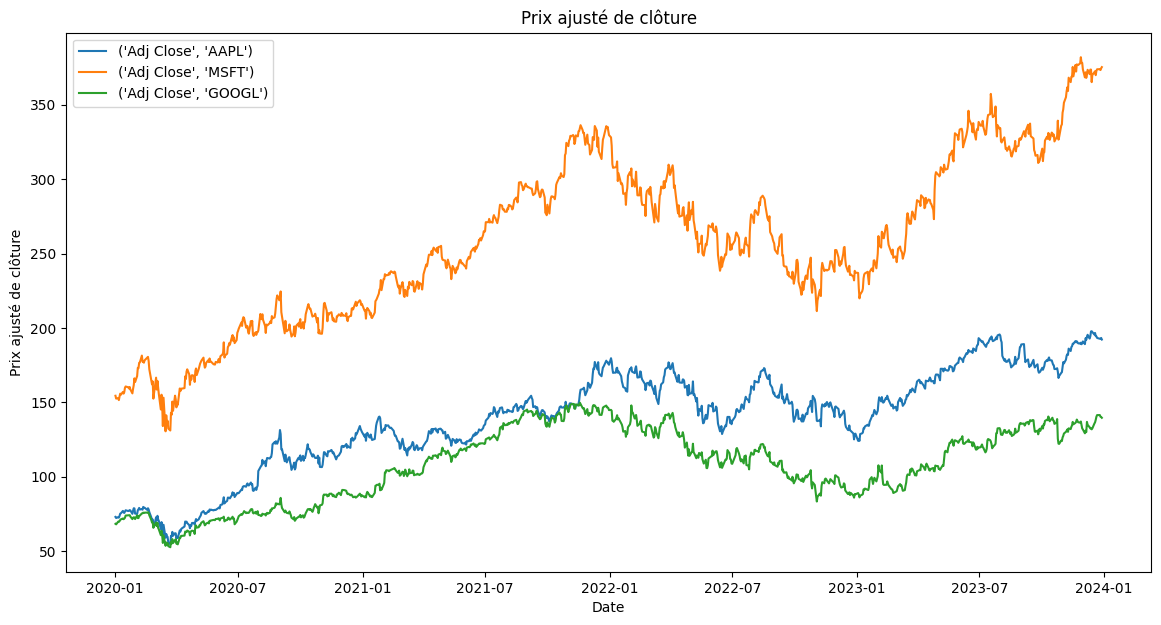

In [ ]:
# Tracer les prix ajustés de clôture
plt.figure(figsize=(14, 7))
for c in [('Adj Close', 'AAPL'), ('Adj Close', 'MSFT'), ('Adj Close', 'GOOGL')]:
    plt.plot(df.index, df[c], label=str(c))
plt.title('Prix ajusté de clôture')
plt.xlabel('Date')
plt.ylabel('Prix ajusté de clôture')
plt.legend()
plt.show()


#<font color='darkpink'>Calcul de la volatilité et du rendement des actions</font>

In [ ]:
# Calcul des rendements journaliers
df['AAPL_Returns'] = df[('Adj Close', 'AAPL')].pct_change()
df['MSFT_Returns'] = df[('Adj Close', 'MSFT')].pct_change()
df['GOOGL_Returns'] = df[('Adj Close', 'GOOGL')].pct_change()

# Calcul des rendements logaritmiques
df['AAPL_Log_Returns'] = np.log(df[('Adj Close', 'AAPL')] / df[('Adj Close', 'AAPL')].shift(1))
df['MSFT_Log_Returns'] = np.log(df[('Adj Close', 'MSFT')] / df[('Adj Close', 'MSFT')].shift(1))
df['GOOGL_Log_Returns'] = np.log(df[('Adj Close', 'GOOGL')] / df[('Adj Close', 'GOOGL')].shift(1))


In [ ]:
# Calcul de la volatilité sur 30 jours (utilisation de la fenêtre mobile)
df['AAPL_Volatility'] = df['AAPL_Returns'].rolling(window=30).std() * np.sqrt(30)
df['MSFT_Volatility'] = df['MSFT_Returns'].rolling(window=30).std() * np.sqrt(30)
df['GOOGL_Volatility'] = df['GOOGL_Returns'].rolling(window=30).std() * np.sqrt(30)


In [ ]:
print(df.columns)


Index([ ('Adj Close', 'AAPL'), ('Adj Close', 'GOOGL'),  ('Adj Close', 'MSFT'),
            ('Close', 'AAPL'),     ('Close', 'GOOGL'),      ('Close', 'MSFT'),
             ('High', 'AAPL'),      ('High', 'GOOGL'),       ('High', 'MSFT'),
              ('Low', 'AAPL'),       ('Low', 'GOOGL'),        ('Low', 'MSFT'),
             ('Open', 'AAPL'),      ('Open', 'GOOGL'),       ('Open', 'MSFT'),
           ('Volume', 'AAPL'),    ('Volume', 'GOOGL'),     ('Volume', 'MSFT'),
                   'AAPL_div',             'MSFT_div',            'GOOGL_div',
                 'AAPL_split',           'MSFT_split',          'GOOGL_split',
               'AAPL_Returns',         'MSFT_Returns',        'GOOGL_Returns',
           'AAPL_Log_Returns',     'MSFT_Log_Returns',    'GOOGL_Log_Returns',
            'AAPL_Volatility',      'MSFT_Volatility',     'GOOGL_Volatility'],
      dtype='object')


In [ ]:
for ticker in ['AAPL', 'GOOGL', 'MSFT']:
    df[f'{ticker}_Returns'] = df[('Adj Close', ticker)].pct_change()






#Analyse de la Volatilité

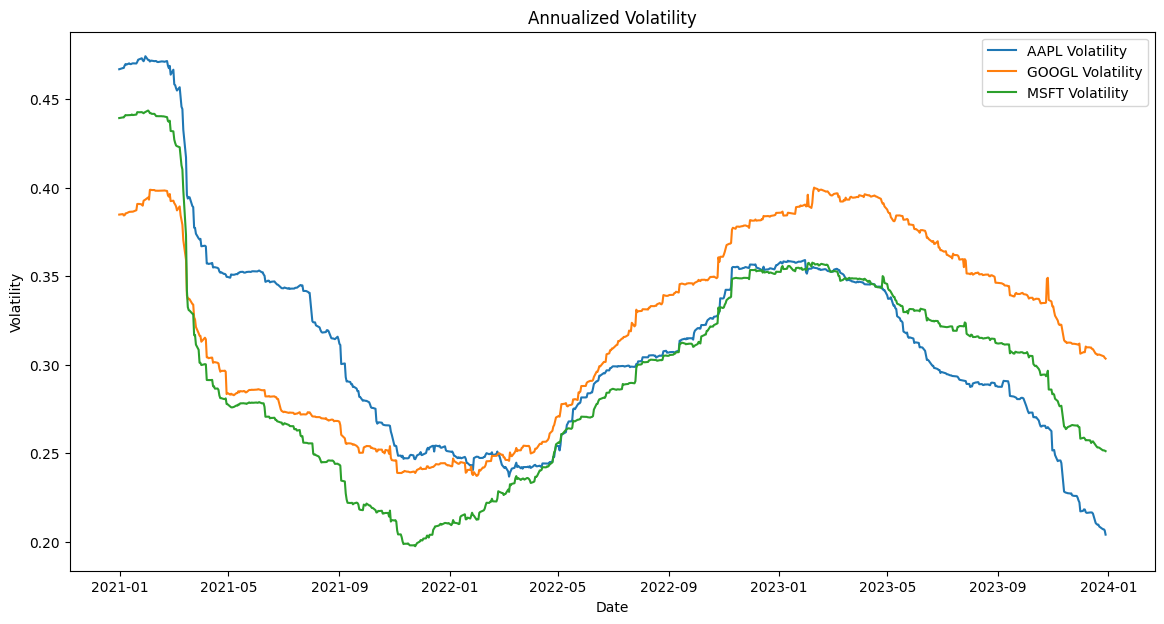

In [ ]:
for ticker in ['AAPL', 'GOOGL', 'MSFT']:
    df[f'{ticker}_Volatility'] = df[f'{ticker}_Returns'].rolling(window=252).std() * (252**0.5)  # Annualized Volatility

plt.figure(figsize=(14, 7))
for ticker in ['AAPL', 'GOOGL', 'MSFT']:
    plt.plot(df.index, df[f'{ticker}_Volatility'], label=f'{ticker} Volatility')
plt.title('Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [ ]:
returns = df[[f'{ticker}_Returns' for ticker in ['AAPL', 'GOOGL', 'MSFT']]]
correlation_matrix = returns.corr()
print(correlation_matrix)


               AAPL_Returns  GOOGL_Returns  MSFT_Returns
AAPL_Returns       1.000000       0.691375      0.777003
GOOGL_Returns      0.691375       1.000000      0.772643
MSFT_Returns       0.777003       0.772643      1.000000


#<font color='blue'>Simulation de portefeuille avec la méthode Monte Carlo</font><br>
1. **Optimisation de portefeuille** : Les simulations de Monte Carlo permettent de tester diverses combinaisons de poids d'actifs dans un portefeuille pour déterminer l'allocation la plus optimale en termes de rendement ajusté au risque. Cela aide les investisseurs à prendre des décisions d'investissement éclairées.

2. **Évaluation des rendements** : La simulation de Monte Carlo permet de modéliser et de prévoir les performances potentielles d'un portefeuille en tenant compte de la variabilité des rendements d'actifs différents.







#<font color='darkpink'>Optimisation de portefeuille basée sur la théorie moderne de Markowitz</font>

In [ ]:
# Calcul des rendements moyens et de la matrice de covariance
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Fonction pour calculer la variance du portefeuille
def portfolio_variance(weights, mean_returns, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Contrainte pour que la somme des poids soit 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Poids initiaux égaux entre les actions
num_assets = len(tickers)
init_guess = num_assets * [1. / num_assets]

# Optimisation pour minimiser la variance
bounds = tuple((0, 1) for asset in range(num_assets))
result = minimize(portfolio_variance, init_guess, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

print("Weights for minimum variance portfolio:", result.x)


Weights for minimum variance portfolio: [0.33333333 0.33333333 0.33333333]



#<font color='darkpink'>Intérpretation :</font>
####Les poids optimaux pour le portefeuille à variance minimale, calculés en utilisant la méthode de minimisation de la variance avec des contraintes d'égalité, sont les suivants : [0.33, 0.33, 0.33]. Ces poids suggèrent que les trois actifs devraient être répartis de manière égale dans le portefeuille pour minimiser le risque global.

In [ ]:
# Paramètres de simulation
num_simulations = 1000
num_days = 252  # Simuler un an de rendements quotidiens
tickers = ['AAPL', 'GOOGL', 'MSFT']
weights = np.array([0.34, 0.33, 0.33])  # Poids hypothétiques pour chaque action

# Calcul des moyennes et de la matrice de covariance des rendements
mean_returns = df[[f'{ticker}_Returns' for ticker in tickers]].mean()
cov_matrix = df[[f'{ticker}_Returns' for ticker in tickers]].cov()

# Simulation des rendements de portefeuille
portfolio_returns = []
for _ in range(num_simulations):
    # Générer des rendements multivariés
    simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, num_days)
    # Calcul des rendements du portefeuille
    sim_port_returns = np.sum(simulated_returns * weights, axis=1)
    portfolio_returns.append(np.cumprod(1 + sim_port_returns)[-1] - 1)

# Analyse des résultats
print(f'Moyenne des rendements finaux: {np.mean(portfolio_returns)}')
print(f'Écart-type des rendements finaux: {np.std(portfolio_returns)}')
print(f'Drawdown maximal: {min(portfolio_returns)}')


Moyenne des rendements finaux: 0.3067813675010111
Écart-type des rendements finaux: 0.3820122783133059
Drawdown maximal: -0.4984927236598621


#<font color='darkpink'>Intérpretation :</font>
Les simulations de portefeuille montrent un rendement moyen positif de 32.25% sur la période simulée, suggérant que les investissements ont été rentables. Cependant, l'écart-type élevé de 0.4107 et le drawdown maximal de 55.23% indiquent une grande volatilité et des risques importants liés aux investissements dans ce portefeuille.

<ipython-input-25-4f3b337be53f>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[f'Simulation_{i+1}'] = np.cumprod(1 + sim_port_returns) - 1
<ipython-input-25-4f3b337be53f>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[f'Simulation_{i+1}'] = np.cumprod(1 + sim_port_returns) - 1
<ipython-input-25-4f3b337be53f>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

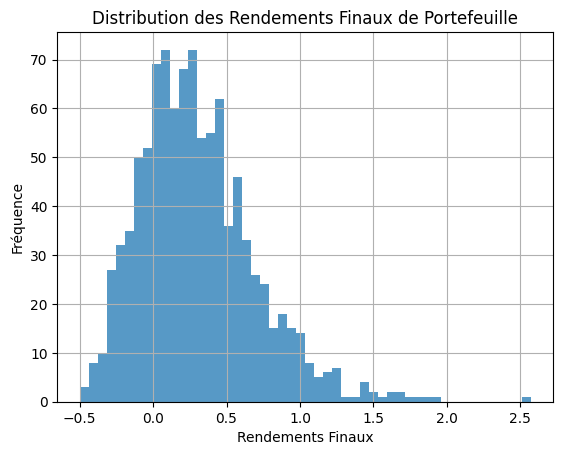

       Simulation_1  Simulation_2  Simulation_3  Simulation_4  Simulation_5  \
count    252.000000    252.000000    252.000000    252.000000    252.000000   
mean       0.191328     -0.092812      0.368493      0.260902      0.032440   
std        0.206590      0.051823      0.281623      0.179184      0.195848   
min       -0.134314     -0.226958     -0.058198     -0.031731     -0.198017   
25%        0.018516     -0.129676      0.174100      0.123796     -0.133904   
50%        0.165047     -0.094933      0.286667      0.241196     -0.030587   
75%        0.293580     -0.054884      0.517558      0.377095      0.248719   
max        0.708751      0.013413      1.271043      0.848899      0.426143   

       Simulation_6  Simulation_7  Simulation_8  Simulation_9  Simulation_10  \
count    252.000000    252.000000    252.000000    252.000000     252.000000   
mean       0.596371      0.031887      0.066459      0.265613       0.210935   
std        0.504585      0.073287      0.094998 

In [ ]:
# Initialiser un DataFrame pour stocker les résultats des simulations
simulation_df = pd.DataFrame()

# Simulation des rendements de portefeuille
for i in range(num_simulations):
    # Générer des rendements multivariés
    simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, num_days)
    # Calcul des rendements du portefeuille
    sim_port_returns = np.sum(simulated_returns * weights, axis=1)
    # Stocker le rendement cumulatif du portefeuille à la fin de la période
    simulation_df[f'Simulation_{i+1}'] = np.cumprod(1 + sim_port_returns) - 1

# Calcul des statistiques descriptives pour chaque simulation
stats = simulation_df.describe()

# Visualisation de la distribution des rendements finaux de toutes les simulations
final_returns = simulation_df.iloc[-1]
final_returns.hist(bins=50, alpha=0.75)
plt.title('Distribution des Rendements Finaux de Portefeuille')
plt.xlabel('Rendements Finaux')
plt.ylabel('Fréquence')
plt.show()

# Afficher les statistiques descriptives
print(stats)


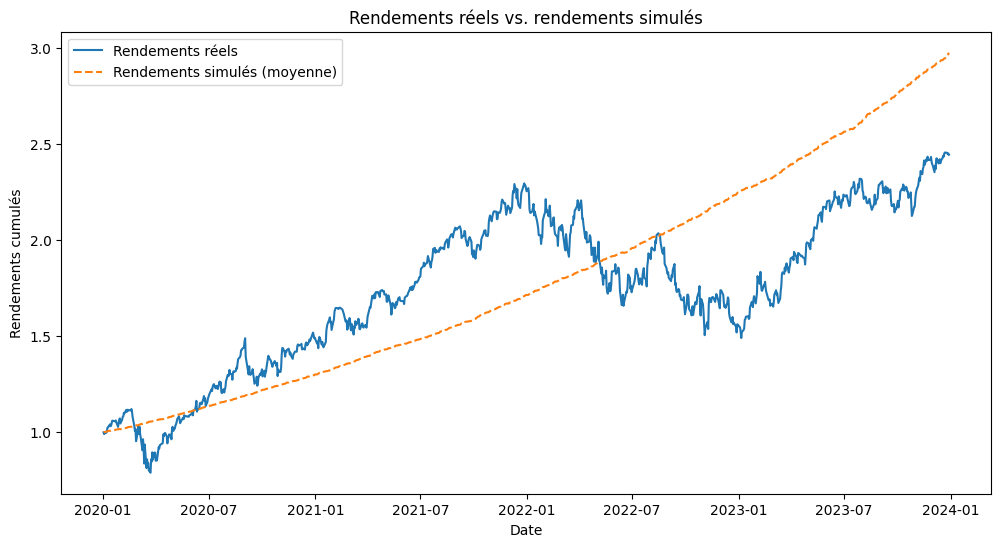

In [ ]:
# Calculer les rendements cumulés réels
df['Portfolio_Real_Returns'] = (df[[f'{ticker}_Returns' for ticker in tickers]] * weights).sum(axis=1)
df['Portfolio_Real_Cumulative_Returns'] = (1 + df['Portfolio_Real_Returns']).cumprod()

# Réinitialisation de la liste des rendements simulés
portfolio_returns = []

# Simulation des rendements de portefeuille
for _ in range(num_simulations):
    # Générer des rendements multivariés
    simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, len(df))
    # Calcul des rendements du portefeuille
    sim_port_returns = np.sum(simulated_returns * weights, axis=1)
    # Calculer les rendements cumulés simulés
    cumulative_simulated_returns = (1 + sim_port_returns).cumprod()
    # Ajouter les rendements cumulés simulés à la liste
    portfolio_returns.append(cumulative_simulated_returns)

# Calcul de la moyenne des rendements cumulés simulés à chaque période
simulated_mean_cumulative_returns = np.mean(portfolio_returns, axis=0)

# Tracer les rendements réels et simulés
plt.figure(figsize=(12, 6))

# Rendements réels
plt.plot(df.index, df['Portfolio_Real_Cumulative_Returns'], label='Rendements réels')

# Rendements simulés (moyenne des simulations)
plt.plot(df.index, simulated_mean_cumulative_returns, label='Rendements simulés (moyenne)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Rendements cumulés')
plt.title('Rendements réels vs. rendements simulés')
plt.legend()
plt.show()


#<font color='darkpink'>Bibliographie</font>

https://fastercapital.com/fr/contenu/Simulation-Monte-Carlo-pour-la-gestion-de-portefeuille---un-apercu-et-quelques-exemples.html

https://www.bnains.org/optimisation/optimisation_portefeuille.php

https://apps.apple.com/us/app/yahoo-finance-stocks-news/id328412701

https://major-prepa.com/python/methode-monte-carlo-estimation-python/

#<font color='darkpink'>Merci pour votre attention ❤</font>